In [14]:
import pandas as pd
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets
from typing import Dict, List, Tuple
from random import random
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

## Convolutional neural network
Instead of leverage temporal information for prediction, we'll exploit the spatial information and how can machine learning techniques be implemented to solve spatial information related preoblems. Let's look at the image classification problem. We'll start from a handwritten digit dataset called 'mnist'. This dataset contains handwritten digits images. It is also a well known dataset in machine learning community just like the iris dataset. It is an image classification benchmark dataset. 

We could load it easily from keras datasets module. 

In [15]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()  # it is originally ordered from 0 to 9. 
np.random.seed(121) # let's shuffle it. 121 is a seed number, this number will remember the shuffling order such that we won't get lost later. 
np.random.shuffle(X_train)
np.random.seed(121)
np.random.shuffle(y_train)

Let's visually look at some data. 

In [16]:
y_train

array([7, 4, 1, ..., 1, 9, 8], dtype=uint8)

Text(0.5, 1.0, '6')

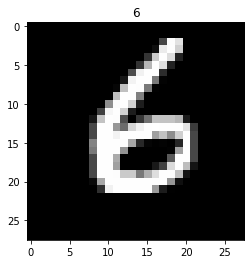

In [17]:
plot_ind = 140
plt.imshow(X_train[plot_ind], cmap = 'gray')
plt.title(str(y_train[plot_ind]))

In [20]:
X_train[140]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  70, 253, 226,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  14, 235, 254, 208,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  53, 203, 254, 221,  35,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  51, 182, 254, 223,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

We'll split the dataset into training and testing dataset. To avoid scale issues that might make training hard, we'll scale each image to a range between [0, 1]. Image pixels' values are between 0 and 255, so we'll only need to divide it by 255. 

In [21]:
X_train = np.expand_dims(X_train, -1)  # add one additional dimension (color band, although we're just 1d, it becomes a tradition to store image data like that)
X_test = np.expand_dims(X_test, -1)
X_train = X_train.astype('float32') / 255  # normalize the data. 
X_test = X_test.astype('float32') / 255 # normalize the data. 

we'll now construct a CNN model. We'll explain what those parameter means in the lecture. 

In [22]:
model = Sequential(
[
    Input(shape = (28, 28, 1)),  # input data shape
    Conv2D(32, kernel_size=(3,3), activation='relu'),  # convolutional layer, specify the kernal size. 
    MaxPooling2D(pool_size=(2,2)),  # pooling function, no parameters involved. 
    Conv2D(64, kernel_size=(3,3), activation='relu'), # 2nd convolution layer
    MaxPooling2D(pool_size=(2,2)), # pooling operation, no parameters involved. 
    Flatten(), # faltten the multiple dimension feature space into 1d
    Dense(10, activation='softmax'),     # fully connected layer with a softmax activation function. 
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [24]:
X_train.shape

(60000, 28, 28, 1)

In [25]:
to_categorical(y_train[0:global_settings['train_size']])

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
global_settings={
    'lr':.001,
    'batch':128,
    'train_size': 6000,  # to speed up the training, we might want use only a portion for illustration purposes. 
    'epoch': 10
}

opt=Adam(learning_rate = global_settings['lr'])
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

history = model.fit(X_train[0:global_settings['train_size'],:,:,:], 
          to_categorical(y_train[0:global_settings['train_size']]),  # remember the ont hot encoding operation? It is good for classification as labels become numeric instead of categorical.
          validation_data=(X_test, to_categorical(y_test)),
         batch_size=global_settings['batch'], 
         epochs=global_settings['epoch'])

Epoch 1/10
47/47 [==============================] - 6s 138ms/step - loss: 0.0509 - accuracy: 0.6618 - val_loss: 0.0179 - val_accuracy: 0.8857
Epoch 2/10
47/47 [==============================] - 7s 148ms/step - loss: 0.0148 - accuracy: 0.9012 - val_loss: 0.0116 - val_accuracy: 0.9267
Epoch 3/10
47/47 [==============================] - 6s 138ms/step - loss: 0.0100 - accuracy: 0.9368 - val_loss: 0.0077 - val_accuracy: 0.9506
Epoch 4/10
47/47 [==============================] - 7s 141ms/step - loss: 0.0076 - accuracy: 0.9545 - val_loss: 0.0068 - val_accuracy: 0.9578
Epoch 5/10
47/47 [==============================] - 7s 138ms/step - loss: 0.0060 - accuracy: 0.9637 - val_loss: 0.0056 - val_accuracy: 0.9631
Epoch 6/10
47/47 [==============================] - 6s 133ms/step - loss: 0.0052 - accuracy: 0.9682 - val_loss: 0.0054 - val_accuracy: 0.9654
Epoch 7/10
47/47 [==============================] - 6s 127ms/step - loss: 0.0045 - accuracy: 0.9728 - val_loss: 0.0047 - val_accuracy: 0.9696
Epoch 

plot the loss function to see how the training process proceeds. 

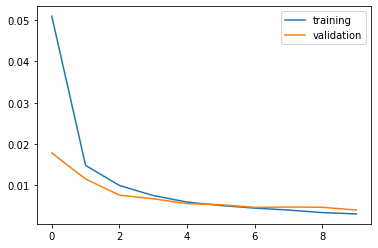

In [28]:
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()

The CNN we just trained reaches to a 98% accuracy in testing data!

In [29]:
model.evaluate(X_test, to_categorical(y_test))

313/313 [==============================] - 3s 8ms/step - loss: 0.0041 - accuracy: 0.9739


[0.004066603258252144, 0.9739000201225281]

[[8.1437058e-08 2.3411579e-09 7.1753482e-07 1.0002849e-05 1.3254227e-03
  1.8123767e-04 2.6847269e-07 1.5535453e-04 7.1082445e-04 9.9761617e-01]]
9


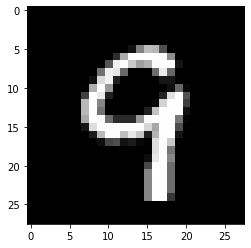

In [31]:
ind = 150
print (model.predict(X_test[[ind],:,:,:]))
print (y_test[ind])
plt.imshow(X_test[ind], cmap='gray')